In [23]:
import cv2
import moviepy
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import keras
from keras.utils.np_utils import to_categorical 
import random
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#convert video to frames, was already done in the dataset downlaoded from UCF

In [3]:
path = "drive/MyDrive/archive/"
sports = ["walking", "volleyball", "tennis", "swing"]
# walking, volleyball, tennis, swing

In [4]:
#create X and Y train
XTrain = []
YTrain = []

for i in range(0,len(sports)):
  for file in glob.glob(path+"training_set/"+sports[i]+"/*.jpg"):
    YTrain.append(i)
    XTrain.append(cv2.imread(file))

In [5]:
#create X and Y test

XTest = []
YTest = []

for i in range(0,len(sports)):
  for file in glob.glob(path+"training_set/"+sports[i]+"/*.jpg"):
    YTest.append(i)
    XTest.append(cv2.imread(file))

In [6]:
print(len(XTrain), len(YTrain))
YTrain[-1]

1606 1606


3

3


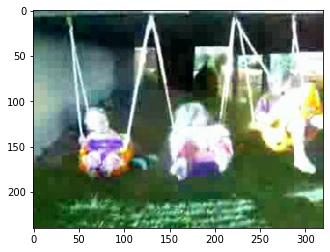

In [7]:
plt.imshow(XTrain[1600])
print(YTrain[1600])

In [8]:
len(XTrain), len(XTest), len(YTrain), len(YTrain)

(1606, 1606, 1606, 1606)

In [9]:
#need to have images with the same dimensions
width = 150
length = 150

resized = []
resized_test = []
#resize and adjust colors
for img in XTrain:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized.append(cv2.resize(img, dsize=(width, length), interpolation=cv2.INTER_CUBIC))

for img in XTest:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized_test.append(cv2.resize(img, dsize=(width, length), interpolation=cv2.INTER_CUBIC))

In [10]:
plt.imshow(resized[0])
print(resized[0].shape)

(150, 150, 3)


In [11]:
#check shapes
print(resized[130].shape, len(resized))

(150, 150, 3) 1606


In [12]:
YTrain = np.asarray(YTrain)
XTrain = np.asarray(resized)
YTest = np.asarray(YTest)
XTest = np.asarray(resized_test)

In [13]:
XTrain.shape, YTrain.shape, XTest.shape, YTest.shape

((1606, 150, 150, 3), (1606,), (1606, 150, 150, 3), (1606,))

In [14]:
#One hot encoding
YTrain = to_categorical(YTrain, num_classes=4)
YTest = to_categorical(YTest, num_classes=4)

In [15]:
#create model
model = keras.Sequential()
model.add(keras.layers.Conv2D(kernel_size=3,filters=3, activation='relu',input_shape=[length,width,3]))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(4,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 3)       84        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16428)             0         
                                                                 
 dense (Dense)               (None, 512)               8411648   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 8,413,784
Trainable params: 8,413,784
Non-trainable params: 0
______________________________________________

In [17]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
XTrain.shape

(1606, 150, 150, 3)

In [29]:
data_dir = path+"/training_set"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20) # set validation split

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(width, length),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True) 

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(width, length),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

Found 1286 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


In [28]:
data_dir = path+"/testing_set"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.20) # set validation split

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(width, length),
    batch_size=32,
    class_mode='categorical',
    shuffle=True) 


Found 264 images belonging to 4 classes.


In [32]:
model.fit(x=train_generator, validation_data=validation_generator, epochs=30)
#model.fit(XTrain, YTrain, epochs=10, batch_size = 64)

Epoch 1/30
41/41 [==============================] - 19s 455ms/step - loss: 0.9201 - accuracy: 0.5972 - val_loss: 1.7107 - val_accuracy: 0.3656
Epoch 2/30
41/41 [==============================] - 19s 451ms/step - loss: 0.7734 - accuracy: 0.7123 - val_loss: 1.7264 - val_accuracy: 0.3906
Epoch 3/30
41/41 [==============================] - 19s 463ms/step - loss: 0.6737 - accuracy: 0.7675 - val_loss: 1.9847 - val_accuracy: 0.4563
Epoch 4/30
41/41 [==============================] - 17s 420ms/step - loss: 0.5912 - accuracy: 0.8142 - val_loss: 1.7648 - val_accuracy: 0.4656
Epoch 5/30
41/41 [==============================] - 17s 418ms/step - loss: 0.5211 - accuracy: 0.8359 - val_loss: 1.6948 - val_accuracy: 0.4750
Epoch 6/30
41/41 [==============================] - 17s 419ms/step - loss: 0.4503 - accuracy: 0.8779 - val_loss: 1.7800 - val_accuracy: 0.5063
Epoch 7/30
41/41 [==============================] - 17s 419ms/step - loss: 0.4016 - accuracy: 0.8904 - val_loss: 1.7034 - val_accuracy: 0.5125

In [38]:
YPredict = model.predict(test_generator)

In [40]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(test_acc)

0.810606062412262
